In [ ]:
import pandas as pd

usage_instruction_df = pd.read_csv('resources/product_usage_instruction.csv')
usage_instruction_df.dropna(inplace=True, subset=['ProductUsageInstruction'])
usage_instruction_df

In [2]:
import spacy
import re
from spacy.tokens import Token
#spacy.cli.download('en_core_web_md')
nlp = spacy.load('en_core_web_md')
pos_tag_keep = ['NOUN', 'VERB', 'ADJ', 'ADV']

filter_pos_lambda = lambda token: token.pos_ in pos_tag_keep
filter_stop_words_lambda = lambda token: not token.is_stop
filter_word_lambda = lambda token: token not in ['product', 'warning', 'use']
map_lemma_lambda = lambda token: token.lemma_
map_lower_lambda = lambda token_text: token_text.lower()
def map_remove_punct_numbers_func(text: str):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\d?]', '', text)
    text = re.sub(r'-', '', text)
    text = text.strip()
    return text

def preprocess_text(text: str):
    """
    From a text, return a list of tokens that are lemmatized and lowered,
    filter by pos tag and stop words
    """
    text = map_remove_punct_numbers_func(text)
    doc = nlp(text)
    tokens = filter(filter_pos_lambda, doc)
    tokens = filter(filter_stop_words_lambda, tokens)
    tokens_lemmed_list = list(map(map_lemma_lambda, tokens))
    tokens_lemmed_lowered_list = list(map(map_lower_lambda, tokens_lemmed_list))
    tokens_lemmed_lowered_list = list(filter(filter_word_lambda, tokens_lemmed_lowered_list))
    return tokens_lemmed_lowered_list

processed_tokens_list = []
for usage_instruction_text in usage_instruction_df['ProductUsageInstruction']:
    processed_tokens_list.append(preprocess_text(usage_instruction_text))
    print(processed_tokens_list[-1])




['drink', 'directly', 'chill']
['instantly']
['chill']
['serve', 'chill']
['serve']
['directly']
['direct', 'boil']
['shake']
['wet', 'body']
['eat', 'immediately', 'open', 'package']
['dairectly', 'expiry', 'date']
['spice', 'favorite', 'dish']
['directly', 'suitable', 'cook', 'make', 'sauce', 'dish', 'pizza', 'pasta', 'french', 'fry']
['food', 'seasoning', 'create', 'delicious', 'taste', 'expiry', 'date']
['wash', 'process']
['directly', 'expiry', 'date']
['great', 'dip', 'tortilla', 'chip', 'cool', 'flavour', 'complement', 'crunchy', 'texture', 'seasoned', 'flavour', 'crisps', 'perfectly']
['heat', 'sauce', 'pan', 'mix', 'freshly', 'boil', 'pasta', 'expiration', 'date']
['heat', 'tbsp', 'oil', 'sauce', 'pan', 'sachet', 'green', 'paste', 'fry', 'aromatic', 'add', 'g', 'skinless', 'boneless', 'chicken', 'breast', 'cut', 'bitesize', 'piece', 'stirfry', 'coat', 'meat', 'paste', 'add', 'ml', 'coconut', 'milk', 'ml', 'water', 'bring', 'boil', 'add', 'g', 'assorted', 'vegetable', 'eggplant

In [3]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(processed_tokens_list)
# fine-tune the dictionary by removing words that are too rare or too common from the dictionary:
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=1000)
# dictionary is the token and the id, it is a dictionary for quick lookup
print(dictionary.token2id)

{'chill': 0, 'directly': 1, 'serve': 2, 'boil': 3, 'direct': 4, 'eat': 5, 'open': 6, 'date': 7, 'expiry': 8, 'dish': 9, 'cook': 10, 'pasta': 11, 'sauce': 12, 'delicious': 13, 'heat': 14, 'milk': 15, 'well': 16, 'bread': 17, 'salad': 18, 'treatment': 19}


In [4]:
# I will convert the dictionary into a bag-of-words:
# token_list: multiple token combined into a document
bow_corpus = [dictionary.doc2bow(token_list) for token_list in processed_tokens_list]
# each list is the token id and the 1 is the count of the token appearence
print(bow_corpus)

[[(0, 1), (1, 1)], [], [(0, 1)], [(0, 1), (2, 1)], [(2, 1)], [(1, 1)], [(3, 1), (4, 1)], [], [], [(5, 1), (6, 1)], [(7, 1), (8, 1)], [(9, 1)], [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(7, 1), (8, 1), (13, 1)], [], [(1, 1), (7, 1), (8, 1)], [], [(3, 1), (7, 1), (11, 1), (12, 1), (14, 1)], [(2, 1), (3, 1), (10, 1), (12, 2), (14, 1), (15, 1)], [(1, 1), (13, 1)], [(6, 1)], [(6, 2), (16, 1)], [(2, 1), (5, 1), (17, 1)], [(11, 1), (17, 1), (18, 1)], [(2, 1), (11, 1), (18, 1)], [], [(9, 1), (18, 1)], [(1, 1), (5, 1), (9, 1)], [(4, 1), (6, 1), (7, 1), (8, 1)], [(10, 1), (16, 1), (17, 1)], [(4, 1)], [(1, 1), (9, 1), (10, 1), (13, 1)], [(1, 1), (7, 1), (8, 1), (9, 1), (17, 1)], [(1, 1)], [(1, 1)], [(1, 1), (14, 1), (15, 1), (19, 1)], [(1, 1), (14, 1), (15, 1), (19, 1)], [(1, 1), (7, 1), (14, 1), (19, 1)], [(16, 1)], []]


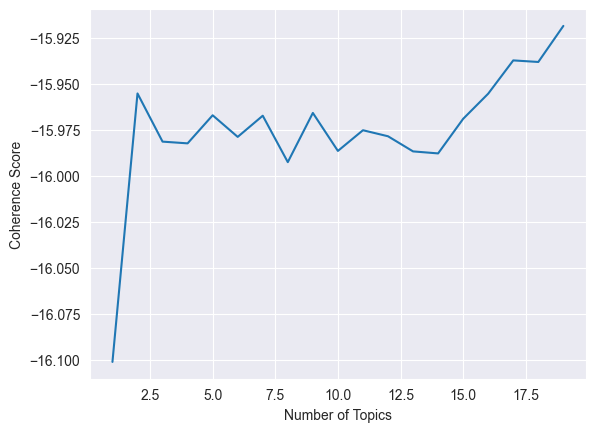

In [5]:
# we can use this
#%%capture
#%%python3 -m spacy download en_core_web_md -qq
# import en_core_web_md
# nlp = en_core_web_md.load()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=bow_corpus, id2word=dictionary\
                            , iterations=10, num_topics=i, workers = 4, passes=10\
                            , random_state=100, per_word_topics=True)
   cm = CoherenceModel(model=lda_model, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [6]:
# select 8 topics as the best number of topics
best_topic_numer = 8
lda_model = LdaMulticore(corpus=bow_corpus, id2word=dictionary\
                        , iterations=10, num_topics=best_topic_numer, workers = 4, passes=10\
                        , random_state=100, per_word_topics=True)
lda_model.print_topics(-1)
lda_model.show_topics(num_topics=best_topic_numer, num_words=10, log=False, formatted=True)


[(0,
  '0.235*"directly" + 0.152*"heat" + 0.115*"sauce" + 0.115*"milk" + 0.078*"treatment" + 0.078*"boil" + 0.046*"date" + 0.042*"serve" + 0.041*"pasta" + 0.041*"cook"'),
 (1,
  '0.250*"well" + 0.132*"bread" + 0.132*"cook" + 0.132*"direct" + 0.132*"boil" + 0.015*"date" + 0.015*"expiry" + 0.015*"dish" + 0.015*"directly" + 0.015*"open"'),
 (2,
  '0.195*"directly" + 0.156*"open" + 0.106*"chill" + 0.106*"cook" + 0.106*"dish" + 0.093*"delicious" + 0.056*"sauce" + 0.056*"pasta" + 0.056*"well" + 0.006*"serve"'),
 (3,
  '0.174*"date" + 0.173*"treatment" + 0.172*"heat" + 0.171*"directly" + 0.020*"expiry" + 0.020*"direct" + 0.020*"open" + 0.019*"bread" + 0.019*"dish" + 0.019*"sauce"'),
 (4,
  '0.326*"expiry" + 0.323*"date" + 0.142*"direct" + 0.075*"open" + 0.008*"directly" + 0.008*"treatment" + 0.008*"milk" + 0.008*"heat" + 0.008*"dish" + 0.008*"eat"'),
 (5,
  '0.314*"dish" + 0.176*"delicious" + 0.166*"salad" + 0.033*"date" + 0.033*"expiry" + 0.019*"well" + 0.019*"pasta" + 0.019*"bread" + 0.018*

In [7]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(lda_display)

In [14]:
usage_instruction_df['Topic'] = [max(lda_model.get_document_topics(bow_corpus[i]), key=lambda x:x[1])[0] for i in range(len(bow_corpus))]
usage_instruction_df['Topic'] = usage_instruction_df['Topic'].astype('category')
print(usage_instruction_df['Topic'])

0     2
1     0
2     2
3     7
5     7
6     0
7     1
8     0
9     0
10    6
11    4
12    5
13    2
14    4
15    0
16    4
17    0
18    0
19    0
20    2
21    2
22    2
23    6
24    7
25    7
26    0
27    5
28    6
29    4
30    1
31    4
32    2
33    6
34    0
35    0
36    0
37    0
38    3
39    1
40    0
Name: Topic, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


In [53]:
topic_dict = {}
topics_result = lda_model.show_topics(num_topics=best_topic_numer, num_words=5, log=False, formatted=False)
for topic_id, tokens_probability_for_topic in topics_result:
    word_representation = ", ".join([token for token, _prob in tokens_probability_for_topic])
    print("Topic #{}: {}".format(topic_id, word_representation))
    topic_dict[topic_id] = word_representation

print(topic_dict)
return_df = pd.DataFrame.from_dict(topic_dict, orient='index', columns=['TopicWords'])
return_df.to_csv('resources/lda_topics_usage_instruction_type.csv', index=True)

Topic #0: directly, heat, sauce, milk, treatment
Topic #1: well, bread, cook, direct, boil
Topic #2: directly, open, chill, cook, dish
Topic #3: date, treatment, heat, directly, expiry
Topic #4: expiry, date, direct, open, directly
Topic #5: dish, delicious, salad, date, expiry
Topic #6: eat, bread, dish, directly, serve
Topic #7: serve, pasta, salad, chill, bread
{0: 'directly, heat, sauce, milk, treatment', 1: 'well, bread, cook, direct, boil', 2: 'directly, open, chill, cook, dish', 3: 'date, treatment, heat, directly, expiry', 4: 'expiry, date, direct, open, directly', 5: 'dish, delicious, salad, date, expiry', 6: 'eat, bread, dish, directly, serve', 7: 'serve, pasta, salad, chill, bread'}


In [23]:
# These are from this medium post, thanks to the authors
# https://brian-ho-44743.medium.com/discover-topics-from-texts-with-gensim-topic-modeling-2d17ba30d084
def get_original_df_with_topic_tokens(ldamodel=lda_model, corpus=bow_corpus, texts=processed_tokens_list):
    """
    From a dataframe, return a dataframe with the topic tokens
    """
    with_topics_df = pd.DataFrame()
    for i,row_list in enumerate(ldamodel[corpus]):
        ## the model computes most likely topic for each word in format of ('topic',%)
        row=row_list[0] if ldamodel.per_word_topics else row_list
        ## sort topic based on largest probability(x[1]) to smallest
        row=sorted(row, key=lambda x: (x[1]), reverse=True)
        # print(row)   
        ## Get dominant_topic, percentage_contribution, keywords for each document
        for j,(topic_num, prop_topic) in enumerate(row):
            ## if there is a dominant topic
            if j==0:
                ## get represent word and probability for each topic
                wp = ldamodel.show_topic(topic_num)
                ## join the words together 
                topic_keywords = ", ".join([word for word, prop in wp])
                with_topics_df = pd.concat([with_topics_df ,pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]).to_frame().T])
            else:
                break
    with_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    # contents = pd.Series(texts)
    # with_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    print(with_topics_df)
    return with_topics_df

with_topics_df = get_original_df_with_topic_tokens(ldamodel=lda_model, corpus=bow_corpus, texts=processed_tokens_list)

  Dominant_Topic Perc_Contribution  \
0              2            0.7082   
0              0             0.125   
0              2            0.5624   
0              7            0.7082   
0              7            0.5624   
0              0            0.5622   
0              1            0.7082   
0              0             0.125   
0              0             0.125   
0              6            0.7081   
0              4            0.7083   
0              5            0.5624   
0              2            0.8528   
0              4            0.5303   
0              0             0.125   
0              4            0.5205   
0              0             0.125   
0              0             0.854   
0              0            0.8905   
0              2            0.7081   
0              2            0.5624   
0              2             0.781   
0              6            0.7799   
0              7            0.7811   
0              7            0.7812   
0           